# Import libraries

In [2]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc
import sklearn 
from sklearn.model_selection import train_test_split
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score # evaluation metrics
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package
from sklearn.model_selection import KFold
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # modeling package
os.chdir('C:\\Users\\A4 Dell\\Desktop\\Northwestern University\\Practical Machine Learning\\week4')
#####################################################################

# Read in data and get data summary

In [3]:
############# Modify the max number of rows and columns displayed #############
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
mydata=pd.read_csv('boston.csv') #read in Boston Housing data
mydata.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
mydata=mydata.drop('neighborhood', 1)  #drop Neighborhood variable
print(mydata.shape)     #dataframe size
print(list(mydata.columns))   #check the columns of dataframe

(506, 13)
['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'mv']


In [6]:
mydata.describe(include="all")   #check the magnitudes of data

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


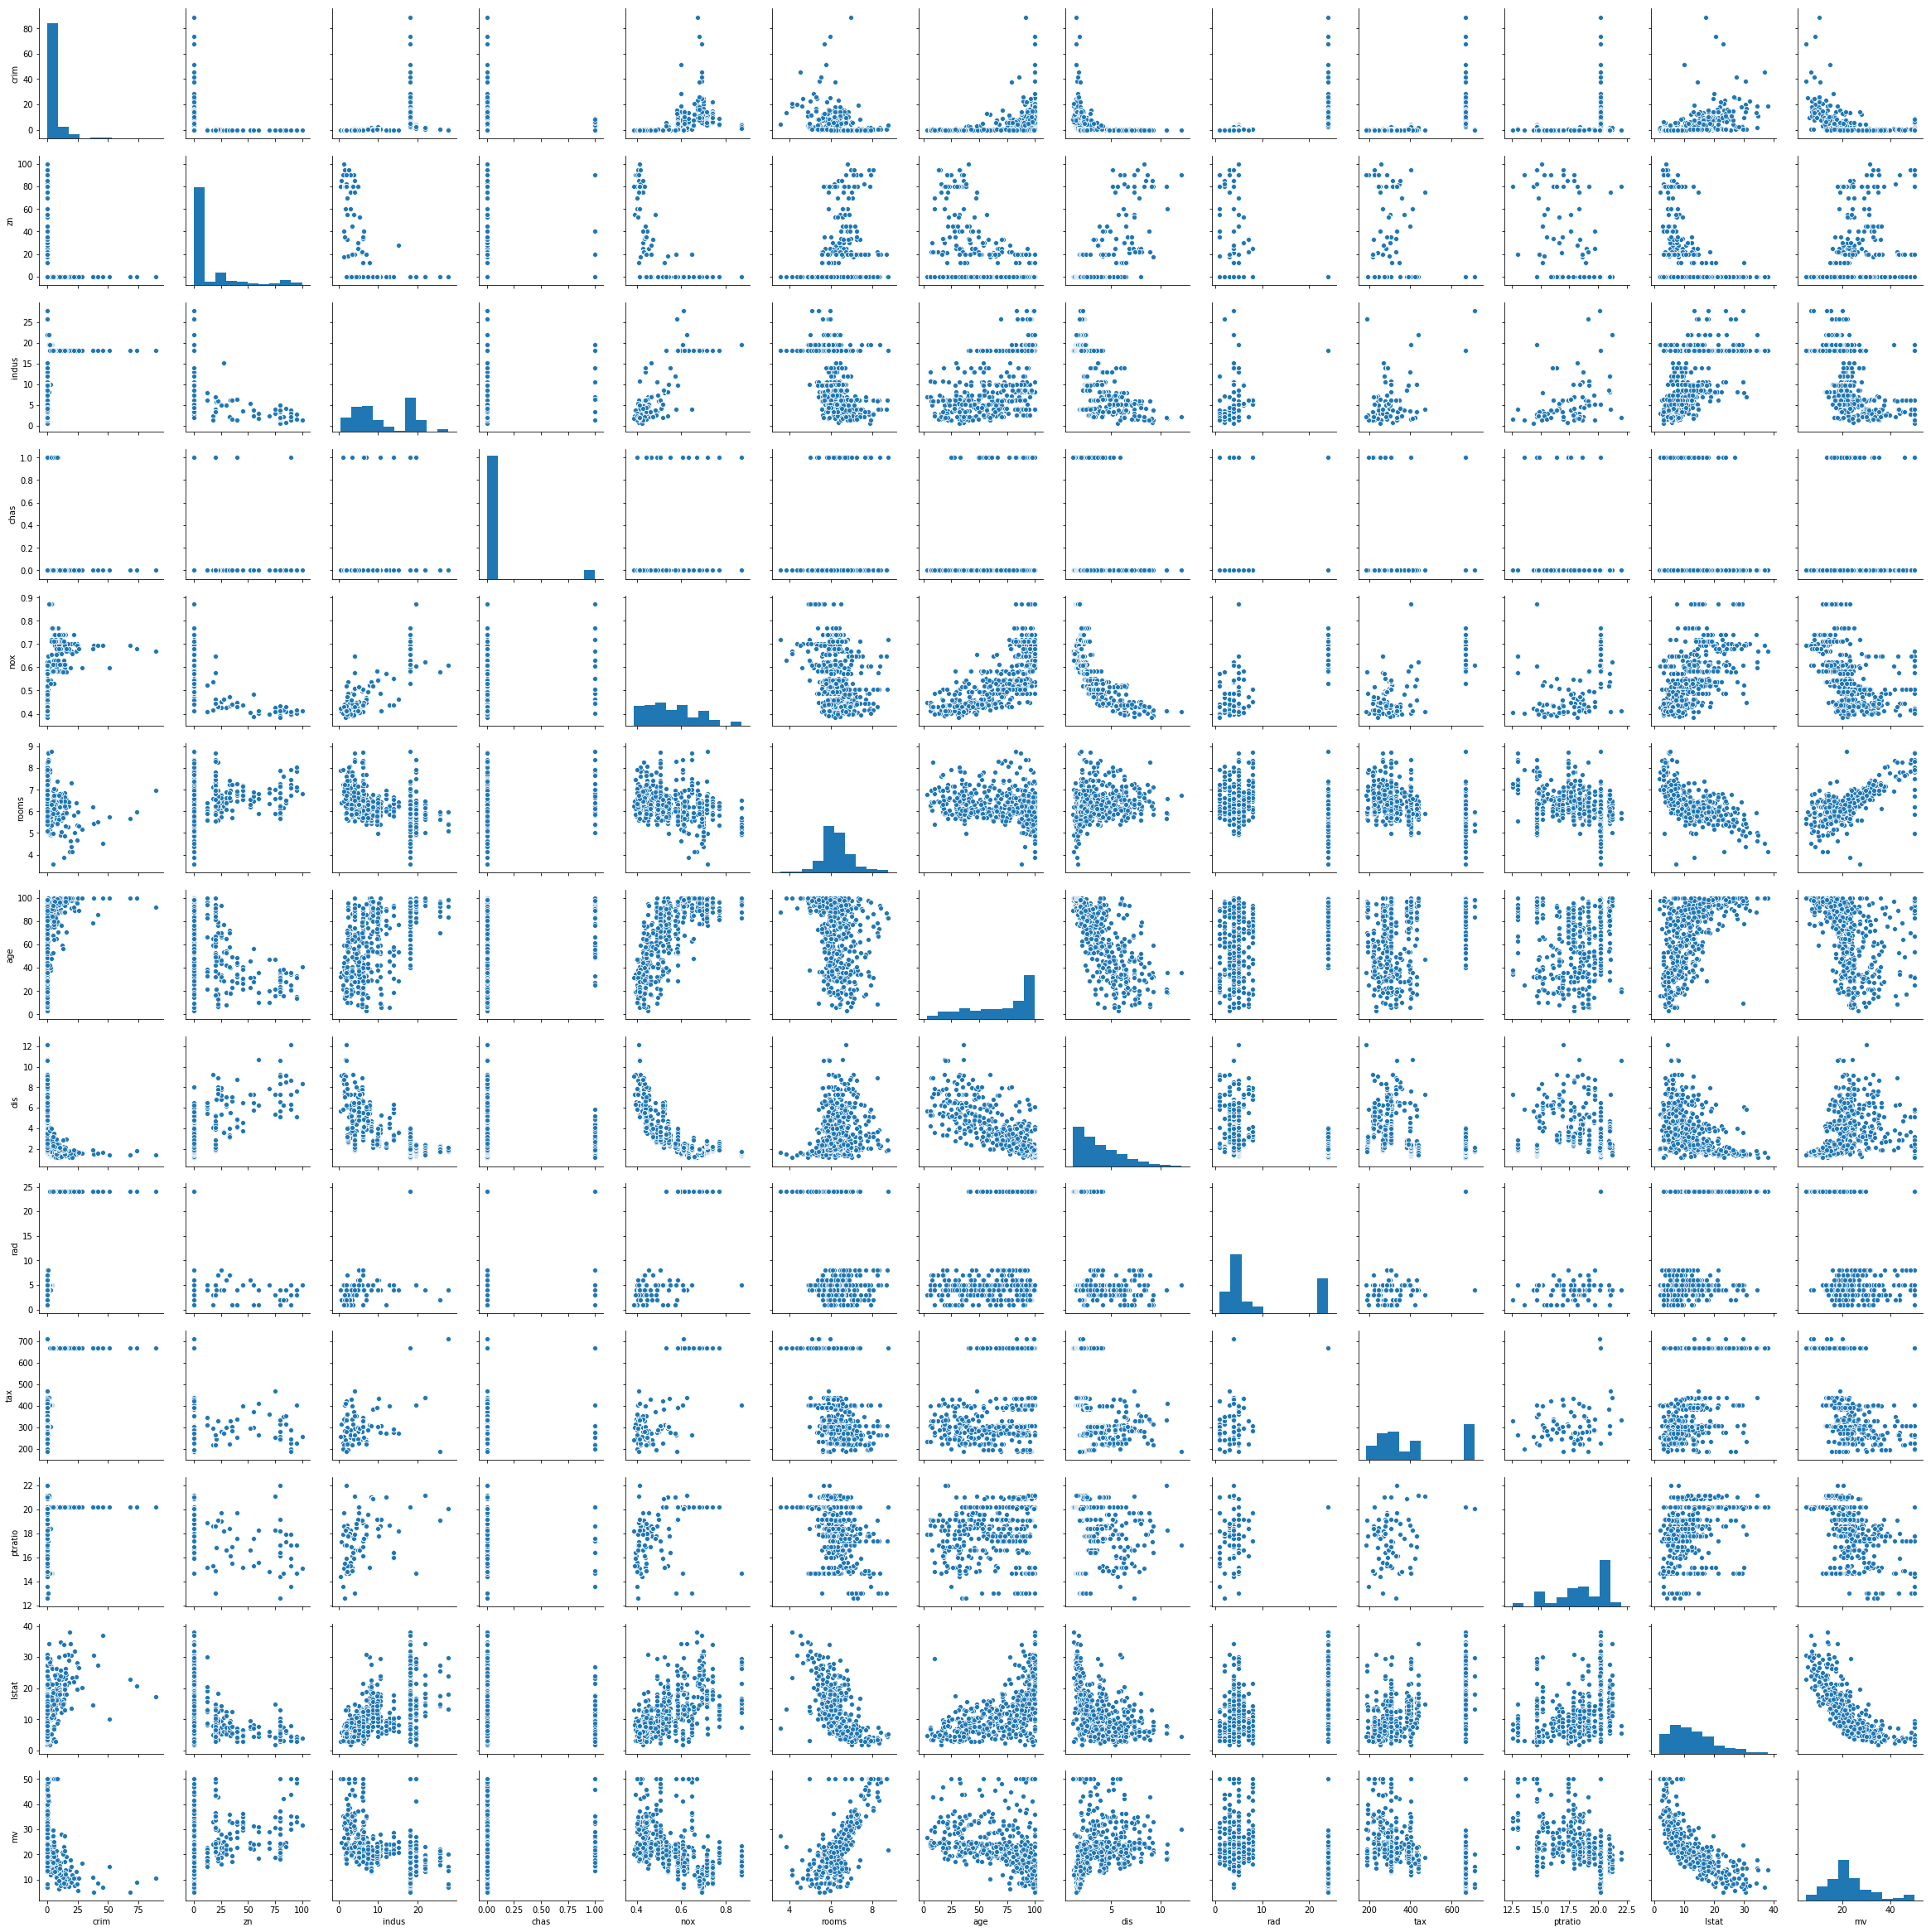

In [7]:
sns.pairplot(mydata, kind='scatter', diag_kind='hist') 
#Plot pairwise relationships in a dataset. 'kind': kind of plot, 'diag_kind': kind of plot for diagonal subplots

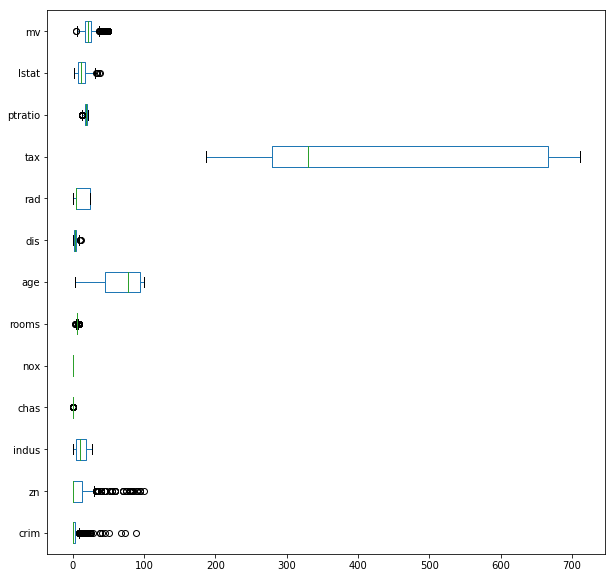

In [8]:
mydata.boxplot(vert=False, figsize=(10,10), grid=False)   #boxplots for data

# Data transformation - normalization and scaling

In [9]:
#variable Tax has larger magnitude than the others. Most of data columns are NOT normally distributed
############# Transform data by BoxCox power transformation to normalized data #############

mydata1 = mydata.apply(lambda x: x+.01)         #each element is added 0.01 to itself to make all elements > 0

mydata2 = mydata1.transform(lambda x: st.boxcox(x)[0])  #st.boxcox() requires positive inputs

mydata2.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,-5.752617,1.708418,1.014663,-587727.552535,-0.810467,2.960401,201.842674,1.264160,0.009943,1.807153,33009.404194,1.939868,4.589093
1,-4.286098,-13.373081,3.075151,-587727.552535,-1.064124,2.905657,260.910629,1.416765,0.664175,1.796475,63758.151000,2.876120,4.380582
2,-4.286990,-13.373081,3.075151,-587727.552535,-1.064124,3.170577,184.938952,1.416765,0.664175,1.796475,63758.151000,1.642857,5.357762
3,-4.076712,-13.373081,0.932774,-587727.552535,-1.111280,3.107229,125.396291,1.568513,1.018925,1.791545,79016.543351,1.226204,5.275245
4,-3.107491,-13.373081,0.932774,-587727.552535,-1.111280,3.157778,157.365823,1.568513,1.018925,1.791545,79016.543351,2.038263,5.450026


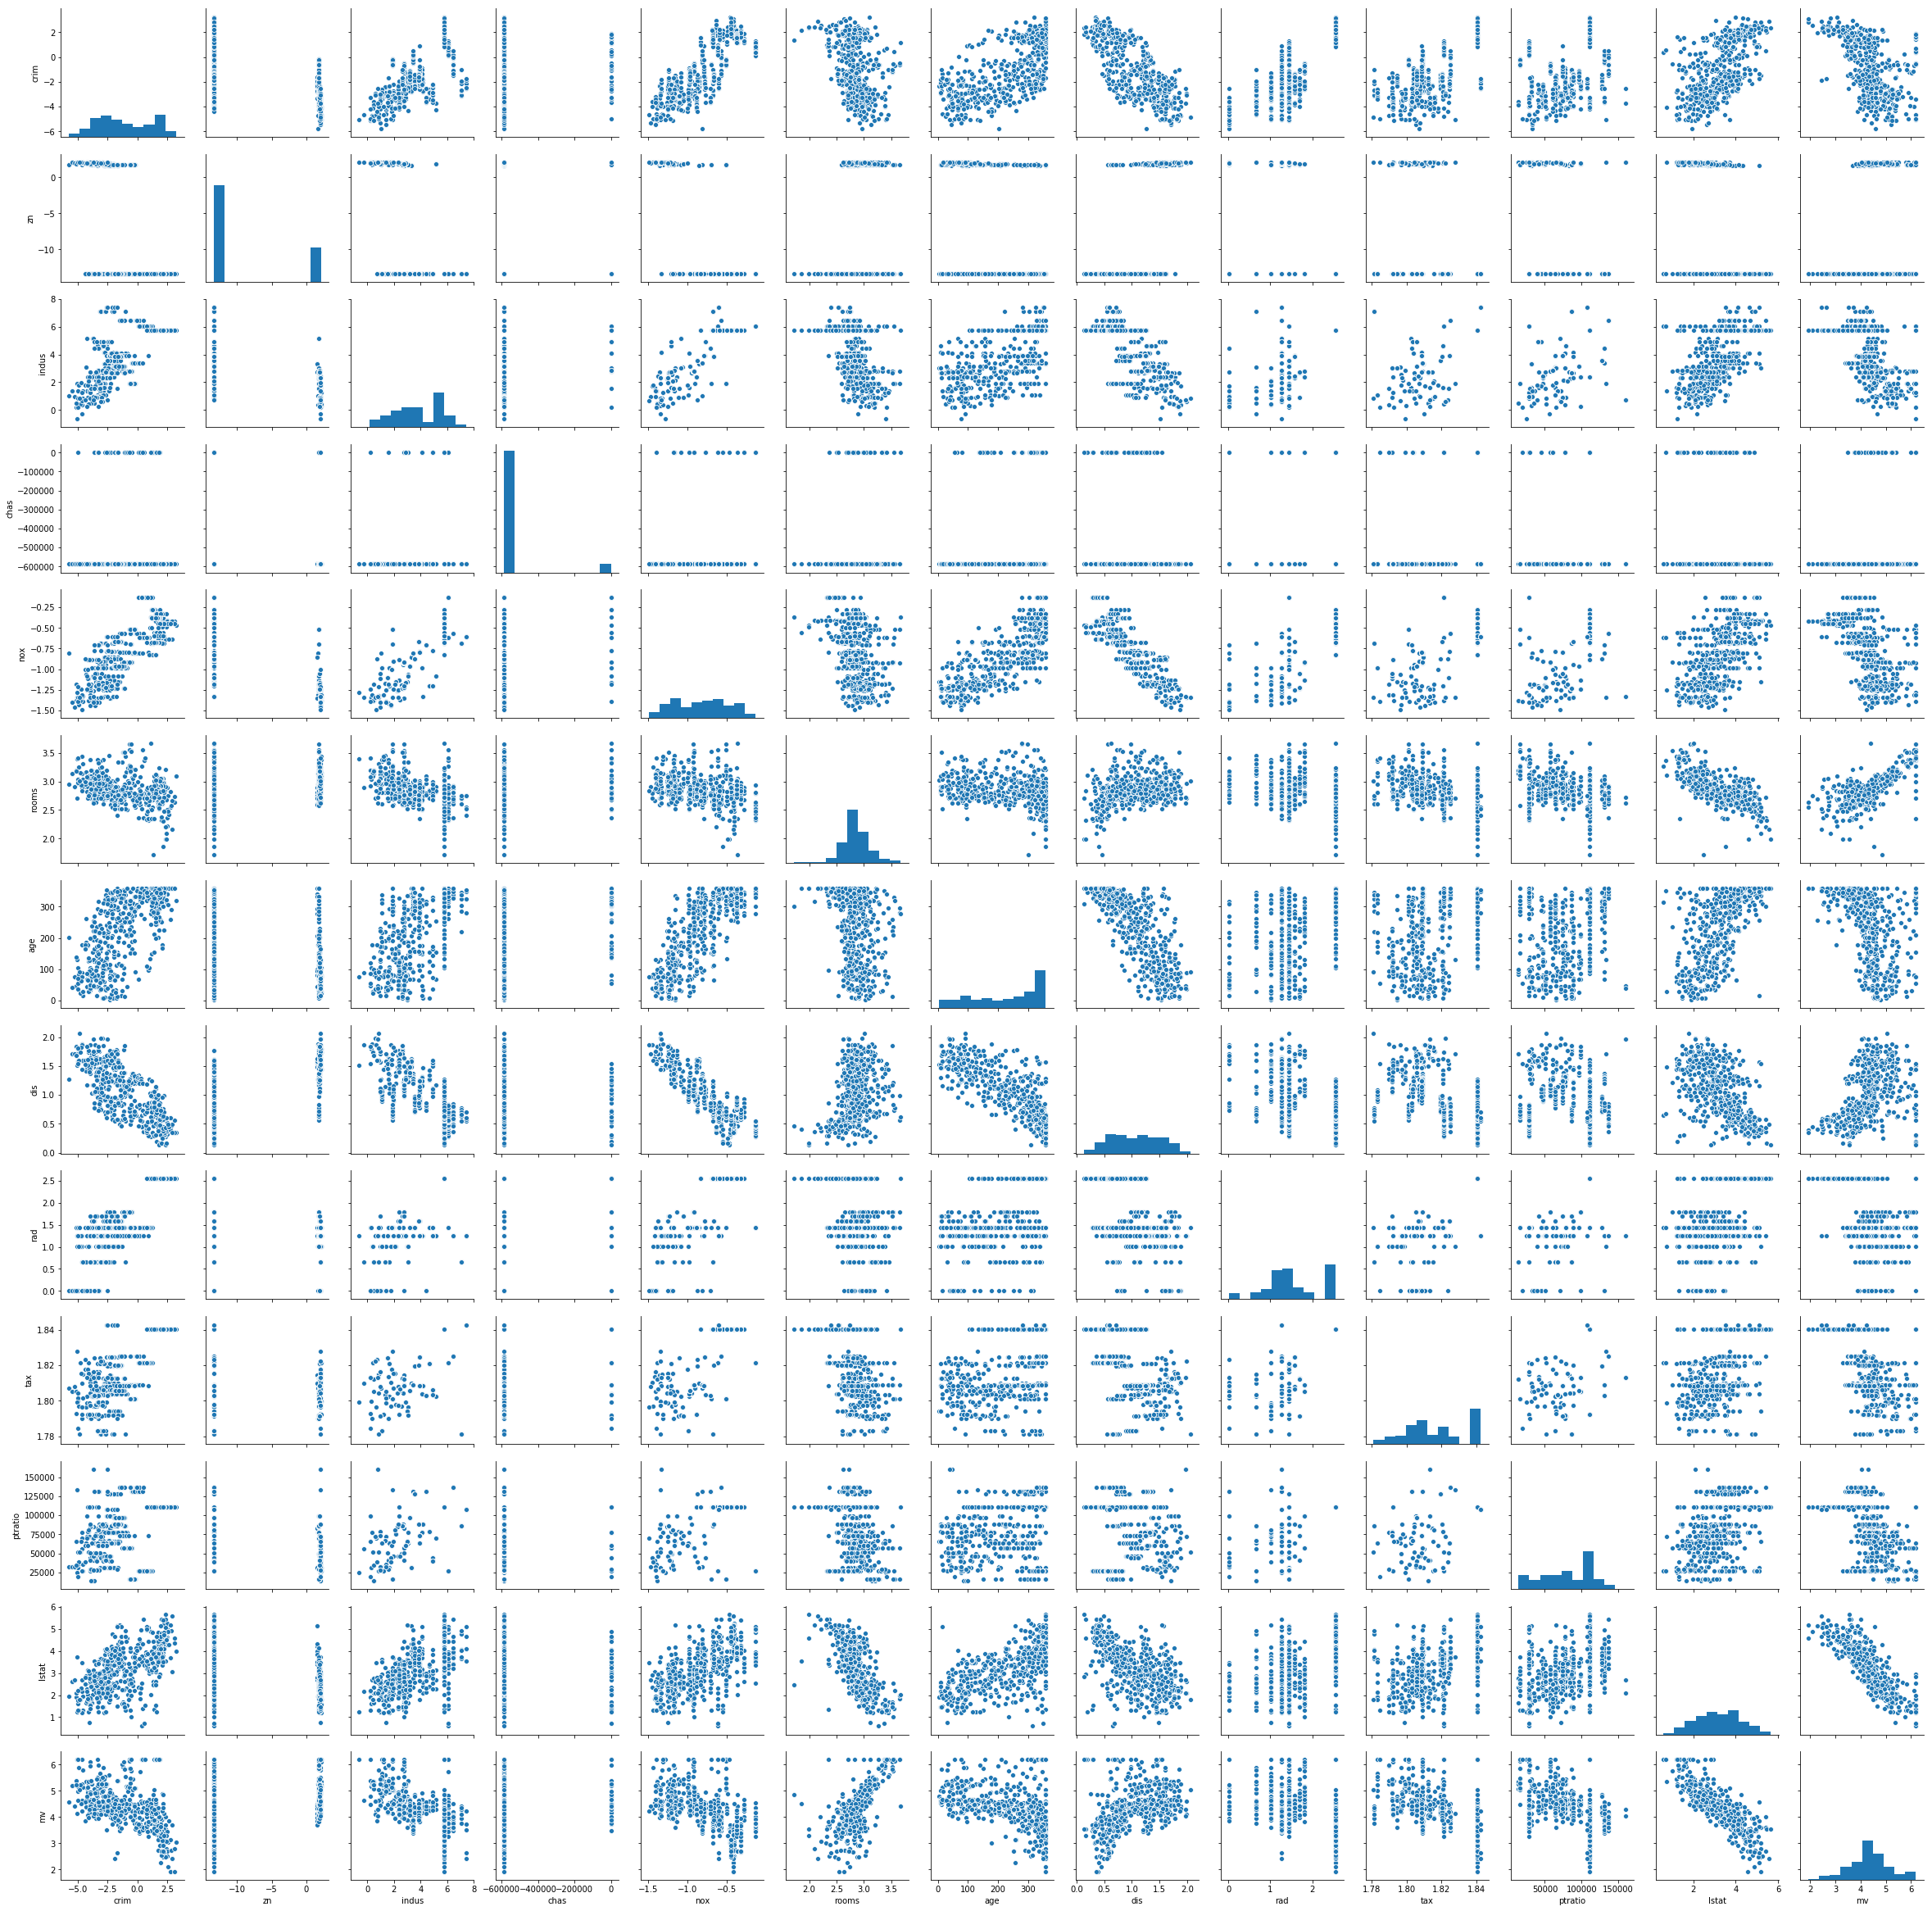

In [10]:
sns.pairplot(mydata2, kind='scatter', diag_kind='hist')   #pairwise plot again, data is closer to normal distribution

In [11]:
############# transform data with Min-Max scaling #############
mydata3 = mydata2.transform(lambda x: (x - x.min()) / (x.max() - x.min()))  #bring to the same level of magnitude/range

In [12]:
mydata3.describe(include='all')   #data summary  

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794,0.566816
std,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937,0.184926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902,0.469325
50%,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193,0.567460
75%,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866,0.644398
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
############# Another way to do min/max transformation #############
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()   #using MinMaxScaler()
newdata = min_max_scaler.fit_transform(mydata3)  #generate an array
df = pd.DataFrame.from_records(newdata)  #call from_records of pandas to convert array to DataFrame
df.describe(include='all')       #data summary. Note: the column name is NOT specified!

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794,0.566816
std,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937,0.184926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902,0.469325
50%,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193,0.567460
75%,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866,0.644398
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
mydata3.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.000000,0.974993,0.206111,0.0,0.500909,0.634505,0.559560,0.587469,0.000000,0.425166,0.128875,0.266577,0.625089
1,0.163141,0.000000,0.462097,0.0,0.313594,0.606602,0.725265,0.666469,0.257546,0.251248,0.339415,0.451500,0.576044
2,0.163042,0.000000,0.462097,0.0,0.313594,0.741634,0.512140,0.666469,0.257546,0.251248,0.339415,0.207913,0.805893
3,0.186434,0.000000,0.195938,0.0,0.278772,0.709345,0.345103,0.745024,0.397197,0.170949,0.443891,0.125618,0.786483
4,0.294254,0.000000,0.195938,0.0,0.278772,0.735110,0.434788,0.745024,0.397197,0.170949,0.443891,0.286011,0.827595


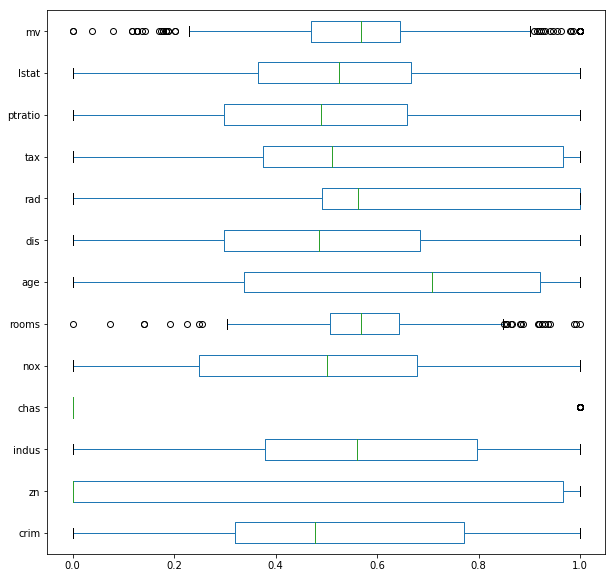

In [15]:
mydata3.boxplot(vert=False, figsize=(10,10), grid=False)   #boxplots for data, check if data is in similar scale

# More visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002855C9C2F28>,
      dtype=object)

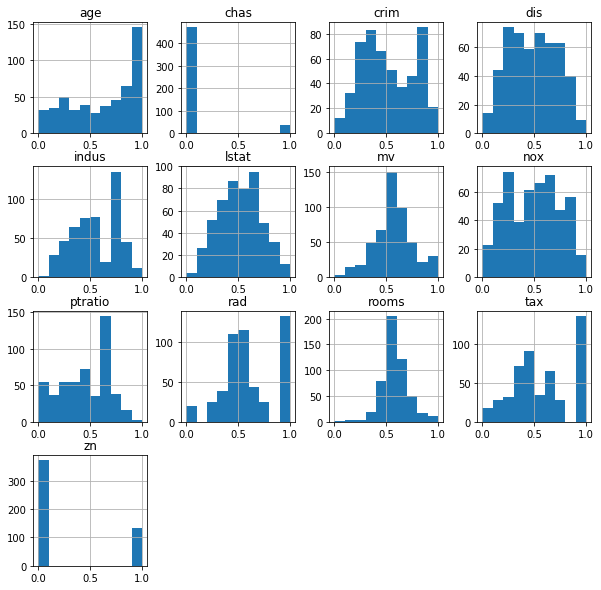

In [16]:
mydata3.hist(figsize=(10,10))

In [33]:
############# Prepare model data wtih the transformed data, using 'mv' as the response variable #############

cols = mydata3.columns.tolist()   #convert dataframe columns to lists; so it would be easier to rearrange the columns
cols[-1:] #negative number means to count from right instead of the left. '-1' refers to the last column
cols[:-1] #all columns except the last one
cols = cols[-1:] + cols[:-1]   #rearrange the order of the columns
mydata_transformed=mydata3[cols]          #make a new dataframe with 'mv' (response var) be the 1st column
mydata_transformed.describe(include="all")   

model_data=mydata_transformed.values

In [36]:
############# Prepare model data wtih the original data, using 'mv' as the response variable #############

cols = mydata2.columns.tolist()   #convert dataframe columns to lists; so it would be easier to rearrange the columns
cols = cols[-1:] + cols[:-1]   #rearrange the order of the columns
mydata_orig=mydata2[cols]          #make a new dataframe with 'mv' (response var) be the 1st column
mydata_orig.describe(include="all")   

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.341350,-1.090732,-9.334916,3.885830,-547074.460278,-0.824672,2.848773,225.269345,1.066739,1.597674,1.816737,81612.178112,3.211761
std,0.786193,2.221821,6.735357,1.874061,149279.298764,0.340739,0.253953,112.467105,0.443686,0.660835,0.017249,34507.214252,1.017330
min,1.931591,-5.752617,-13.373081,-0.644373,-587727.552535,-1.488786,1.715563,2.378960,0.129332,0.009943,1.781049,14187.603558,0.590211
25%,3.926880,-2.884806,-13.373081,2.402806,-587727.552535,-1.151498,2.709439,122.541396,0.704215,1.258682,1.804134,57756.323305,2.437679
50%,4.344089,-1.467281,-13.373081,3.859862,-587727.552535,-0.810467,2.828915,254.701482,1.066618,1.438062,1.812465,85658.803574,3.244158
75%,4.671182,1.181646,1.585824,5.769706,-587727.552535,-0.569822,2.977496,330.554402,1.450347,2.550201,1.840337,110531.906654,3.971560
max,6.182988,3.236648,2.095226,7.404855,0.009797,-0.134610,3.677467,358.844243,2.061056,2.550201,1.842447,160234.715521,5.653128


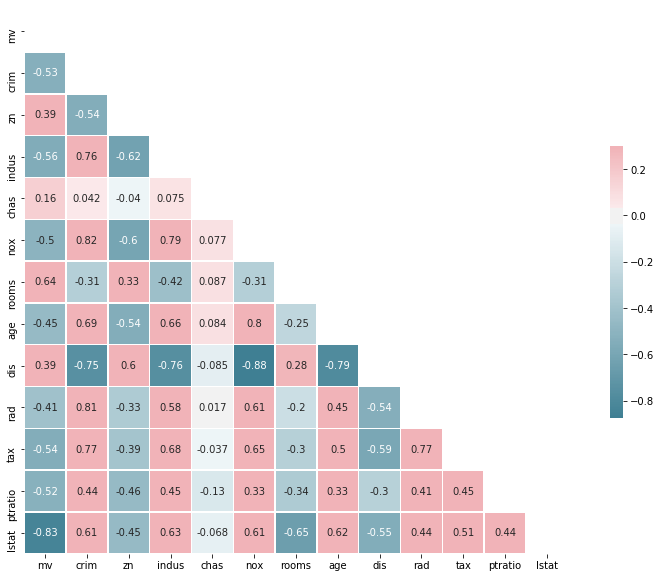

In [22]:
#correlation coefficients heat map for model_data
plt.figure(figsize=(15,10))
corr=mydata_transformed.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Evaluate modeling methods with 10-fold cross-validation

In [25]:
################# set up the modeling methods #####################

RANDOM_SEED = 1  # Seed value for random number generators to obtain reproducible results

# The five model methods that we are going to evaluate
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'RandomForest_Regression', 'GradientBoosting_Regression']

# Specify the set of regression models being evaluated 
# NOTE: we set normalize=False because we have standardized the data in previous data processing steps!
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, 
                    random_state = RANDOM_SEED),
              
              RandomForestRegressor(n_estimators = 200, criterion='mse', max_features = 'log2', bootstrap=True, n_jobs = -1, 
                                    random_state = RANDOM_SEED),
              
              GradientBoostingRegressor(n_estimators = 200, criterion='mse', max_features = 'log2', max_depth=5, 
                                 learning_rate=0.05, loss='ls',random_state = RANDOM_SEED)]

In [37]:
############# Try the original, non-transformed data first #############
model_data=mydata_orig.values  

N_FOLDS = 10  # Establish number of cross folds employed for cross-validation

cv_results = np.zeros((N_FOLDS, len(names)))  # Setup numpy array for storing results, 
                                            # of rows = N_FOLDS, # of columns =len(names)

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)  # Initiate splitting process

index_for_fold = 0  # Fold count initialized 

for train_index, test_index in kf.split(model_data_orig):    #1st level of FOR loop is for k-fold cross-validation
    print('\nFold index:', index_for_fold, '---------------------------------------')
        # Check the splitting process by looking at fold observation counts

    # The structure of modeling data for this study has the response variable coming first and explanatory variables later          
    # so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable 'mv'    
    X_train = model_data[train_index, 1:model_data.shape[1]] 
    X_test = model_data[test_index, 1:model_data.shape[1]]     #model_data.shape=(506,13), model_data.shape[1]=13
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    
    for name, reg_model in zip(names, regressors):  #2nd level of FOR loop is for regressors evaluation
        reg_model.fit(X_train, y_train)  #Fit on the train set for this fold     
        y_test_predict = reg_model.predict(X_test)  # Evaluate on the test set for this fold
        
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))  #calculate RMSE
        
        cv_results[index_for_fold, index_for_method] = fold_method_result      #save RMSE for a regressor to results array
        index_for_method += 1        #move on to the next regressor (2nd level of FOR loop)
  
    index_for_fold += 1   #move on to the next fold (1st level of FOR loop)

cv_results_df = pd.DataFrame(cv_results)   #convert array to data frame
cv_results_df.columns = names   #set up the column names for the above data frame


Fold index: 0 ---------------------------------------

Fold index: 1 ---------------------------------------

Fold index: 2 ---------------------------------------

Fold index: 3 ---------------------------------------

Fold index: 4 ---------------------------------------

Fold index: 5 ---------------------------------------

Fold index: 6 ---------------------------------------

Fold index: 7 ---------------------------------------

Fold index: 8 ---------------------------------------

Fold index: 9 ---------------------------------------


In [38]:
# to see the summary of the results, i.e. how different where the errors across the 10 runs for the regressors being evaluated
cv_results_df.describe()

,Linear_Regression,Ridge_Regression,Lasso_Regression,RandomForest_Regression,GradientBoosting_Regression
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.415820,0.430187,0.436532,0.348732,0.338933
std,0.188505,0.153245,0.152098,0.160073,0.152105
min,0.257769,0.214464,0.244269,0.178613,0.186084
25%,0.299905,0.383053,0.384785,0.268793,0.241362
50%,0.346038,0.407030,0.421372,0.325679,0.284111
75%,0.486852,0.472368,0.463586,0.372101,0.398641
max,0.882498,0.778295,0.793905,0.728158,0.684323


In [39]:
print('\n------------------ Results from Random Search (using raw data) -------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


------------------ Results from Random Search (using raw data) -------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression              0.415820
Ridge_Regression               0.430187
Lasso_Regression               0.436532
RandomForest_Regression        0.348732
GradientBoosting_Regression    0.338933
dtype: float64


In [41]:
############# Try the transformed data to see the impact or normalization and scaling #############
model_data=mydata_transformed.values  

N_FOLDS = 10  # Establish number of cross folds employed for cross-validation

cv_results = np.zeros((N_FOLDS, len(names)))  # Setup numpy array for storing results, 
                                            # of rows = N_FOLDS, # of columns =len(names)

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)  # Initiate splitting process

index_for_fold = 0  # Fold count initialized 

for train_index, test_index in kf.split(model_data_transformed):    #1st level of FOR loop is for k-fold cross-validation
    print('\nFold index:', index_for_fold, '---------------------------------------')
        # Check the splitting process by looking at fold observation counts

    # The structure of modeling data for this study has the response variable coming first and explanatory variables later          
    # so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable 'mv'    
    X_train = model_data[train_index, 1:model_data.shape[1]] 
    X_test = model_data[test_index, 1:model_data.shape[1]]     #model_data.shape=(506,13), model_data.shape[1]=13
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    
    for name, reg_model in zip(names, regressors):  #2nd level of FOR loop is for regressors evaluation
        reg_model.fit(X_train, y_train)  #Fit on the train set for this fold     
        y_test_predict = reg_model.predict(X_test)  # Evaluate on the test set for this fold
        
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))  #calculate RMSE
        
        cv_results[index_for_fold, index_for_method] = fold_method_result      #save RMSE for a regressor to results array
        index_for_method += 1        #move on to the next regressor (2nd level of FOR loop)
  
    index_for_fold += 1   #move on to the next fold (1st level of FOR loop)

cv_results_df = pd.DataFrame(cv_results)   #convert array to data frame
cv_results_df.columns = names   #set up the column names for the above data frame


Fold index: 0 ---------------------------------------

Fold index: 1 ---------------------------------------

Fold index: 2 ---------------------------------------

Fold index: 3 ---------------------------------------

Fold index: 4 ---------------------------------------

Fold index: 5 ---------------------------------------

Fold index: 6 ---------------------------------------

Fold index: 7 ---------------------------------------

Fold index: 8 ---------------------------------------

Fold index: 9 ---------------------------------------


In [42]:
# to see the summary of the results, i.e. how different where the errors across the 10 runs for the regressors being evaluated
cv_results_df.describe()

,Linear_Regression,Ridge_Regression,Lasso_Regression,RandomForest_Regression,GradientBoosting_Regression
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.097808,0.130851,0.110783,0.082057,0.079995
std,0.044340,0.057663,0.052612,0.038990,0.036360
min,0.060632,0.059136,0.044540,0.041262,0.044232
25%,0.070543,0.085085,0.070813,0.064960,0.055630
50%,0.081394,0.119894,0.098781,0.073992,0.067128
75%,0.114516,0.168392,0.144436,0.085372,0.095677
max,0.207578,0.244361,0.209325,0.175465,0.163002


In [151]:
print('\n------------------ Results from Random Search (using transformed data) -------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


------------------ Results from Random Search (using transformed data) -------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
Linear_Regression              0.097808
Ridge_Regression               0.130851
Lasso_Regression               0.110783
RandomForest_Regression        0.082043
GradientBoosting_Regression    0.079166
dtype: float64


In [45]:
#print out the current parameters for random forests
rf = RandomForestRegressor(n_estimators = 200, criterion='mse', max_features = 'log2', bootstrap=True, n_jobs = -1, 
                        random_state = RANDOM_SEED)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [46]:
#print out the current parameters for gradient boosting
gb = GradientBoostingRegressor(n_estimators = 200, criterion='mse', max_features = 'log2', max_depth=5, 
                                 learning_rate=0.05, loss='ls',random_state = RANDOM_SEED)
print('Parameters currently in use:\n')
print(gb.get_params())            

Parameters currently in use:

{'alpha': 0.9, 'criterion': 'mse', 'init': None, 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# Gradiant Boosting and Random Forests have the best performance. 

# Apply Grid Search to test alternative versions of the two methods, select the best parameter combination.

In [51]:
############# Starting Grid Search for Random Forests #############

from sklearn.model_selection import GridSearchCV

# Grid search - hyperparameter tuning the Radom Forest
rf_randomforest = RandomForestRegressor()   # Create a base model

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],              #bootstrap samples are used when building trees
    'max_depth': [5, 10, 20],         #max number of levels in each decision tree
    'max_features': ['log2', 'sqrt'], #max number of features considered for splitting a node
    'min_samples_leaf': [5, 10, 50, 100],    #min number of data points allowed in a leaf node
    'min_samples_split': [2, 4, 8, 10],   #min number of data points placed in a node before the node is split
    'n_estimators': [200, 300, 500]   #number of trees in the foreset
}

grid_search = GridSearchCV(estimator = rf_randomforest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)   #use the training data

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   42.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 20], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [5, 10, 50, 100], 'min_samples_split': [2, 4, 8, 10], 'n_estimators': [200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [52]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = sqrt(mean_squared_error(predictions, test_labels))

    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE=', rmse)
    
    return accuracy

print('The best parameter combination for Random Forest Regression Model:')
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test,y_test)    #evaluate on the test data set

The best parameter combination for Random Forest Regression Model:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 500}
Model Performance
Average Error: 0.0604 degrees.
Accuracy = 81.70%.
RMSE= 0.0847129377055974


In [55]:
############# Starting Grid Search for Gradient Boosting #############
gb_gradientboosting = GradientBoostingRegressor()   # Create a base model

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 20],         #max number of levels in each decision tree
    'max_features': ['log2', 'sqrt'], #max number of features considered for splitting a node
    'min_samples_leaf': [5, 10, 50, 100],    #min number of data points allowed in a leaf node
    'min_samples_split': [2, 4, 8, 10],   #min number of data points placed in a node before the node is split
    'n_estimators': [200, 300, 500],  #number of trees in the foreset
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator = gb_gradientboosting, param_grid = param_grid, 
                          cv = 3, verbose = 2)

grid_search.fit(X_train, y_train)   #use the training data

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=300, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=500 
[CV]  learni

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 20], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [5, 10, 50, 100], 'min_samples_split': [2, 4, 8, 10], 'n_estimators': [200, 300, 500], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [56]:
#check the grid search result for Gradient Boosting method
print('The best parameter combination for Gradient Boosting Regression Model:')
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test,y_test)    #evaluate on the test data set

The best parameter combination for Gradient Boosting Regression Model:
{'learning_rate': 0.1, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}
Model Performance
Average Error: 0.0728 degrees.
Accuracy = 79.60%.
RMSE= 0.096227271830821


# Refit the selected modeling method with full data set

In [137]:
#refit the full data using Random Forest with best parameters 
X=mydata_transformed.iloc[:, 1:model_data.shape[1]]
y=mydata_transformed.iloc[:,0]    # y is mv

myfit_rf=RandomForestRegressor(n_estimators = 500, criterion='mse', max_features = 'log2', bootstrap=True, n_jobs = -1, 
                                max_depth=10, random_state = RANDOM_SEED)

myfit_rf.fit(X,y)

print("R^2=",myfit_rf.score(X,y)) # quick R^2
pred= myfit_rf.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('RMSE=', rmse)

R^2= 0.9781325886823429
RMSE= 0.02731912210918184


In [141]:
#refit the full data using Gradient Boosting with the best parameters
X=mydata_transformed.iloc[:,1:model_data.shape[1]]
y=mydata_transformed.iloc[:,0]   # y is mv

myfit_gb=GradientBoostingRegressor(n_estimators = 500, criterion='mse', max_features = 'log2', max_depth=5, 
                                 learning_rate=0.01, loss='ls', random_state = RANDOM_SEED)

myfit_gb.fit(X,y)

print("R^2=",myfit_gb.score(X,y)) # quick R^2
pred= myfit_gb.predict(X)
rmse = sqrt(mean_squared_error(pred, y))
print('RMSE=', rmse)

R^2= 0.9832821168595383
RMSE= 0.02388683969081827


# Plot the feature importance

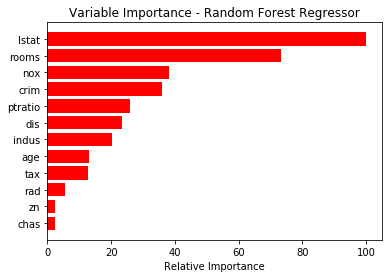

In [139]:
# #############################################################################
# Plot feature importance
feature_importance = myfit_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center', color="r")
plt.yticks(pos, mydata_transformed.columns[1:13][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance - Random Forest Regressor')
plt.show()

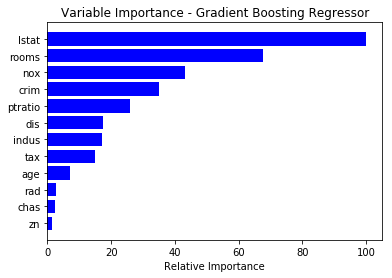

In [142]:
# #############################################################################
# Plot feature importance
feature_importance = myfit_gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center', color="b")
plt.yticks(pos, mydata_transformed.columns[1:13][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance - Gradient Boosting Regressor')
plt.show()

Text(0, 0.5, 'Deviance')

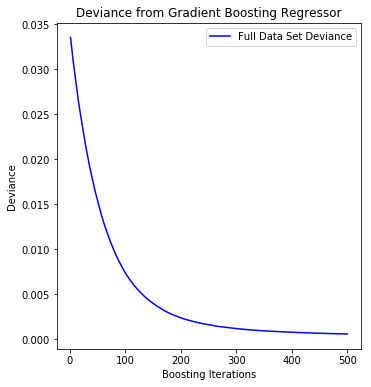

In [150]:
# #############################################################################
# Plot deviance for gradient boosting model

# compute test set deviance
test_score = np.zeros((500,), dtype=np.float64)

for i, y_pred in enumerate(myfit_gb.staged_predict(X)):
    test_score[i] = myfit_gb.loss_(y, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance from Gradient Boosting Regressor')
plt.plot(np.arange(500) + 1, myfit_gb.train_score_, 'b-',
         label='Full Data Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')